# Import Library

In [197]:
# Library Manipulasi & Visualisasi data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Natural Language Processing (NLP)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from langdetect import detect
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer

# Cleaning Text
import re
import string
import emoji

# Download Resource NLTk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Import Dataset

In [198]:
df = pd.read_csv('IShowSpeed_in_IDN.csv')
print(df.info(),'\n')
print(df.shape, '\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        10000 non-null  object
 1   published_at  10000 non-null  object
 2   updated_at    10000 non-null  object
 3   like_count    10000 non-null  int64 
 4   text          10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB
None 

(10000, 5) 



,author,published_at,updated_at,like_count,text
0,@marvell4636,2025-03-24T13:52:03Z,2025-03-24T13:52:03Z,0,"<a href=""https://www.youtube.com/watch?v=9s6im..."
1,@TRICKSTER-y3n,2025-03-24T12:10:52Z,2025-03-24T12:10:52Z,0,Santai
2,@Luckyyy_.,2025-03-24T10:53:52Z,2025-03-24T10:53:52Z,2,"<a href=""https://www.youtube.com/watch?v=9s6im..."
3,@andigunaya6145,2025-03-24T07:26:22Z,2025-03-24T07:26:22Z,0,"<a href=""https://www.youtube.com/watch?v=9s6im..."
4,@ffoldyeard,2025-03-24T03:36:01Z,2025-03-24T03:36:01Z,1,"Hola hermano, ¿por qué vas a Indonesia?"


Informasi:
- Terdapat 5 fitur dengan tipe data object dan int
- Terdapat 10000 record data tanpa missing value

In [199]:
# Cek Missing value
df.isna().sum()

author          0
published_at    0
updated_at      0
like_count      0
text            0
dtype: int64

- Tidak terdapat missing value pada data hasil scraping

In [200]:
# Cek duplicated value
print(f'Jumlah Data Duplicated: {df.duplicated().sum()}')
print('\n', df.shape, '\n')
df.drop_duplicates(inplace=True)
print(f'Cek data duplicated setelah ditangani: {df.duplicated().sum()}')
print('\n', df.shape, '\n')


Jumlah Data Duplicated: 4

 (10000, 5) 

Cek data duplicated setelah ditangani: 0

 (9996, 5) 



Informasi:
- Terdapat 4 data duplicated dan setelah melakukan penanganan tersisa 9996 record data.

In [201]:
print(df.info(), '\n')
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Index: 9996 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        9996 non-null   object
 1   published_at  9996 non-null   object
 2   updated_at    9996 non-null   object
 3   like_count    9996 non-null   int64 
 4   text          9996 non-null   object
dtypes: int64(1), object(4)
memory usage: 468.6+ KB
None 



,author,published_at,updated_at,like_count,text
2817,@HamdanKelinci,2024-09-25T12:34:21Z,2024-09-25T12:34:21Z,0,reza arap🎉🎉❤..
2085,@nofrialbeny3118,2024-09-29T03:32:23Z,2024-09-29T03:32:23Z,1,Malu dan miris liat warga konoha liat artis🤦🏻‍♂️
4129,@jallodeleongultom8309,2024-09-22T12:59:45Z,2024-09-22T12:59:45Z,1,😂😂😂
6256,@habeebanausheen9030,2024-09-20T16:22:49Z,2024-09-20T16:22:49Z,1,Congratulations speed ❤️❤️❤️❤️🔥
9802,@NvrPtou,2024-09-19T14:10:15Z,2024-09-19T14:10:15Z,0,"1 MILLION LIKES IN 1 DAYS, THATS CRAZY DUDE. W..."
9580,@lahoshi5269,2024-09-19T14:47:13Z,2024-09-19T14:47:13Z,0,Astagfirullah lucuuu wkwkwkw
7345,@Lucci_C0,2024-09-20T05:27:11Z,2024-09-20T05:27:11Z,4,MALAYDESH BISA GAK PART 2 YAHAHHAHAHAHAHA HAYU...
3462,@Novita-z3p,2024-09-23T20:57:20Z,2024-09-23T20:57:20Z,0,IShowSpeedSUITV follow en kick
5308,@sitiduriah822,2024-09-21T08:33:14Z,2024-09-21T08:33:14Z,1,Aiylaik indonesia
6305,@edstarlocc,2024-09-20T15:47:27Z,2024-09-20T15:47:27Z,0,"@<a href=""https://www.youtube.com/watch?v=9s6i..."


# Preprocessing

## Handle Slang Words

In [202]:
# Function slangword untuk Indonesia
slangwords_id = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

# Slang Words bahasa Inggris
# Sumber: https://www.kaggle.com/code/nmaguette/up-to-date-list-of-slangs-for-text-preprocessing
slangwords_en = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}


# Gabungkan kedua dictionary slang words

# menggabungkan kedua dictionary menjadi satu. Jika ada key yang sama, nilai dari slangwords_en akan menimpa nilai dari slangwords_id.
combined_slangwords = {**slangwords_id, **slangwords_en}

def is_link_only(text):
    """Periksa apakah teks hanya berisi URL atau string kosong"""
    if not text or not isinstance(text, str): # cek apakah teks kosong atau tidak bertipe string 
        return True # Dianggap tidak valid jika ditemukan
    url_pattern = r'^(?:https?://\S+|www\.\S+|<\s*a\s*href|a href|\s*\.\.\.\s*|\s*&\S+\s*|\s*/\S+\s*)+$' # Mengenali teks yang berisi tautan
    return bool(re.fullmatch(url_pattern, text, flags=re.IGNORECASE)) # Melakukan pencocokan regex url_pattern keseluruh teks

def fix_slangwords(comment):
    """Replace slang words"""
    if not comment or is_link_only(comment): # cek apakah terdapat komen kosong atau url
        return '' # Mengembalikan ke string kosong
    
    # menentukan pola kata slangwords
    pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in combined_slangwords.keys()) + r')\b') 
    return pattern.sub(lambda x: combined_slangwords[x.group().lower()], comment) # melakukan pergantian slang words

## Function Preprocessing Text

In [203]:
# Inisialisasi stemmer untuk bahasa indonesia
factory = StemmerFactory() # Inisialisasi steamer 
stemmer_id = factory.create_stemmer() # steamer untuk teks bahasa Indonesia

# Load stop words untuk bahasa Inggris dan Indonesia
stop_words_en = set(stopwords.words('english')) # Stopwords untuk bahasa Inggris
stop_words_id = set(stopwords.words('indonesian')) # Stopwords untuk bahasa Indonesia

# ==== Function untuk membersihkan teks comment =====
def cleaningComment(comment):
    # Handle missing/NaN values
    if not isinstance(comment, str) or pd.isna(comment): # Cek apakah teks kosong atau tidak bertipe string
        return ''
    
    comment = re.sub(r'@[A-Za-z0-9]+', '', comment) # hapus  mentions
    comment = re.sub(r'#[A-Za-z0-9]+', '', comment) # hapus  Hastag
    comment = re.sub(r'RT[\s]', '', comment) # hapus  RT
    comment = re.sub(r'https?://\S+|www\.\S+|a href\S*', '', comment)  # hapus  URL dan a href
    comment = re.sub(r'[0-9]+', '', comment) # hapus  numbers
    comment = re.sub(r'[^\w\s.,!?]', '', comment)  # Keep basic punctuation
    comment = re.sub(r'<.*?>|&[a-z]+;', '', comment) # hapus  HTML tags
    
    comment = comment.replace('\n', ' ') # Replcae new line ke spasi/jarak
    comment = comment.translate(str.maketrans('', '', string.punctuation))
    comment = comment.lower().strip() # Mengonversi ke huruf kecil dan menghapus spasi
    
    # Lewati pemrosesan lebih lanjut jika kosong atau hanya tautan
    if not comment or is_link_only(comment):
        return ''
    
    comment = fix_slangwords(comment)  # hapus slang words
    comment = emoji.replace_emoji(comment, replace='')  # Hapus emoji
    return comment

# ==== Language Processing Functions ========
# Deteksi bahasa
def detect_language(text):
    if not text or len(text.split()) < 2: # Cek apakah teks kosong atau kata kurang dari 2
        return 'unknown' # mengubah ke unknown
    try:
        return detect(text) # Jika lolos akan di detect ke bahasa indo atau english
    except:
        return 'unknown'
    
# Function untuk memproses teks bahasa inggris
def comment_en(comment): 
    if not comment or is_link_only(comment):
        return ''
    words = word_tokenize(comment) # Memecah komentar menjadi token/kata
    words = [word for word in words if word.isalpha() and len(word) > 1]  # Hanya menyimpan kata-kata yang terdiri dari huruf saja
    words = [word for word in words if word not in stop_words_en]  # Menghapus stopwords
    return ' '.join(words) if words else '' # Jika setelah dibersihkan masih ada kata, gabungkan jadi satu string jika tidak ada return ke kosong

# Function untuk memproses teks bahasa Indonesia
def comment_id(comment):
    if not comment or is_link_only(comment):
        return ''
    words = word_tokenize(comment) # Memecah komentar menjadi token/kata
    words = [word for word in words if word.isalpha() and len(word) > 1]  # Hanya menyimpan kata-kata yang terdiri dari huruf saja
    words = [stemmer_id.stem(word) for word in words]  # Stemming
    words = [word for word in words if word not in stop_words_id]  # Menghapus stopwords
    return ' '.join(words) if words else '' # Jika setelah dibersihkan masih ada kata, gabungkan jadi satu string jika tidak ada return ke kosong

# Fungsi untuk memfilter hanya bahasa Inggris dan Indonesia
def filter_language(comment, lang):
    """Filter comments based on detected language"""
    if not comment or is_link_only(comment): # Cek apakah comment kosong atau berisi link
        return '' # Mengembalikan ke string kosong
    
    detected_lang = detect_language(comment) # Mendeteksi bahasa 
    
    # Jika bahasa yang diminta adalah Inggris
    if lang == 'en': # Mendeteksi bahasa inggris
        return comment if detected_lang == 'en' else ''
    # Jika bahasa yang diminta adalah Indonesia
    elif lang == 'id': # mendeteksi bahasa indonesia 
        return comment if detected_lang == 'id' else ''
    return ''

# Main Processing dan final text MAIN PROCESSING PIPELINE
def preprocess_dataframe(df):
    # proses cleaning data teks
    df['clean_text'] = df['text'].apply(cleaningComment) # menyimpan data hasil cleaning
    
    # Mendeteksi bahasa pada teks
    df['language'] = df['clean_text'].apply(detect_language) # menyimpan data teks hasil deteksi bahasa 
    
    # Step 3: Language-specific processing
    df['final_text'] = '' # menyimpan final text hasil preprocessing
    
    # Process English comments
    en_mask = df['language'] == 'en'
    df.loc[en_mask, 'final_text'] = df.loc[en_mask, 'clean_text'].apply(comment_en)
    
    # Process Indonesian comments
    id_mask = df['language'] == 'id'
    df.loc[id_mask, 'final_text'] = df.loc[id_mask, 'clean_text'].apply(comment_id)
    
    # Filter hasil yang kosong dan non-ID/EN comments
    df = df[df['final_text'].str.strip().astype(bool)]
    df = df[df['language'].isin(['en', 'id'])]
    
    # tambahkan word count untuk analysis
    df['word_count'] = df['final_text'].apply(lambda x: len(x.split()))
    
    return df.reset_index(drop=True)

## Apply fucntion Preprocessing

In [204]:
# EXECUTE PROCESSING
clean_df = preprocess_dataframe(df)

# Save cleaned data
clean_df.to_csv('cleaned_comments.csv', index=False)

# Show results
print(f"Original shape: {df.shape} | Cleaned shape: {clean_df.shape}")
print("\nSample processed comments:")
print(clean_df[['text', 'language', 'final_text']].sample(5))

Original shape: (9996, 8) | Cleaned shape: (5324, 9)

Sample processed comments:
                                       text language  \
2042                      Keren ❤ saya suka       id   
1340                🎉selamat datang brother       id   
4865                         W indonesia ❤❤       en   
436                           Legendary IRL       en   
3581  Gas in viewnya yok Indonesia mendunia       id   

                              final_text  
2042                          keren suka  
1340                     selamat brother  
4865                           indonesia  
436                  legendary real life  
3581  gas in viewnya yok indonesia dunia  


In [205]:
print(clean_df.info())
clean_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5324 entries, 0 to 5323
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        5324 non-null   object
 1   published_at  5324 non-null   object
 2   updated_at    5324 non-null   object
 3   like_count    5324 non-null   int64 
 4   text          5324 non-null   object
 5   clean_text    5324 non-null   object
 6   language      5324 non-null   object
 7   final_text    5324 non-null   object
 8   word_count    5324 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 374.5+ KB
None


,author,published_at,updated_at,like_count,text,clean_text,language,final_text,word_count
4519,@toysskidss5895,2024-09-19T19:46:59Z,2024-09-19T19:46:59Z,0,takedown this please..malaysia cant lose,takedown this pleasemalaysia cant lose,en,takedown pleasemalaysia cant lose,4
668,@ArjunaHabib-n5l,2024-10-18T05:08:59Z,2024-10-18T05:08:59Z,0,menunjukkan kecepatan,menunjukkan kecepatan,id,cepat,1
851,@lectronicscity5652,2024-10-02T01:34:14Z,2024-10-02T01:34:14Z,0,yo bro you are sick all that mucus coming out ...,iya saudara laki-laki you are sick all that mu...,en,iya saudara sick mucus coming nose need flush ...,9
1184,@cepdani516,2024-09-26T10:34:41Z,2024-09-26T10:34:41Z,0,You like Indonesia? 🇮🇩,you like indonesia,id,you like indonesia,3
374,@RatnaManalu-t1g,2024-12-22T12:37:53Z,2024-12-22T12:37:53Z,0,Apa is mean what,apa is mean what,en,apa mean,2


# Ekstraksi Fitur TF-IDF

In [206]:
# mengubah dataframe menjadi list
corpus = clean_df['final_text'].tolist()

# ---- TF-IDF ----
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Maksimal fitur/ mempertahankan 5000 fitur teratas berdasarkan skor TF-IDF.
    ngram_range=(1, 2),  # Unigram + Bigram/ Menggunakan unigram (kata tunggal) dan bigram (kombinasi dua kata).
    stop_words=list(stop_words_en.union(stop_words_id))  # Gabungkan stopwords
)

tfidf_features = tfidf_vectorizer.fit_transform(corpus) 
# Cetak shape matriks TF-IDF
print("Shape TF-IDF Matrix:", tfidf_features.shape)  # Memeriksa dimensi matriks TF-IDF

# 4. Untuk melihat contoh fitur
print("\nContoh fitur yang dihasilkan:")
print(tfidf_vectorizer.get_feature_names_out()[:10])  # 10 fitur pertama

Shape TF-IDF Matrix: (5324, 5000)

Contoh fitur yang dihasilkan:
['aamiin' 'abang' 'abangkuh' 'able' 'absolutely' 'aceh' 'achieving'
 'achieving million' 'achieving subscribers' 'actions']


# Pelabelan Dataset

In [207]:
from textblob import TextBlob

# Fungsi pelabelan otomatis dengan TextBlob
def label_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.1:
        return 'positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'
'''
TextBlob(text).sentiment.polarity menghasilkan nilai antara -1.0 sampai 1.0:
- Semakin mendekati +1, makin positif.
- Semakin mendekati -1, makin negatif.
- Sekitar 0 dianggap netral.
'''

# Tambahkan kolom label
clean_df['sentiment'] = clean_df['final_text'].apply(label_sentiment)

# Verifikasi distribusi label
print("\nDistribusi Label Sentimen:")
print(clean_df['sentiment'].value_counts())


Distribusi Label Sentimen:
sentiment
neutral     3844
positive    1133
negative     347
Name: count, dtype: int64


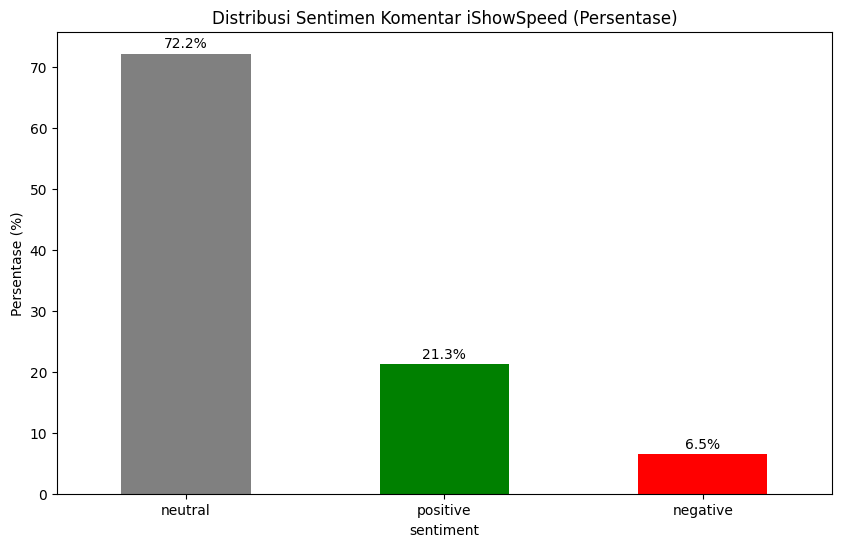


Frekuensi Sentimen:
sentiment
neutral     3844
positive    1133
negative     347
Name: count, dtype: int64

Persentase Sentimen:
sentiment
neutral     72.2
positive    21.3
negative     6.5
Name: count, dtype: float64


In [208]:
# Visualisasi distribusi sentimen dengan persentase
plt.figure(figsize=(10,6))
sentiment_counts = clean_df['sentiment'].value_counts()
sentiment_percent = sentiment_counts / len(clean_df) * 100

ax = sentiment_percent.plot(kind='bar', color=['gray', 'green', 'red'])
plt.title('Distribusi Sentimen Komentar iShowSpeed (Persentase)')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=0)

# Tambahkan label persentase di atas setiap bar
for i, v in enumerate(sentiment_percent):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.show()

# Tabel frekuensi
print("\nFrekuensi Sentimen:")
print(sentiment_counts)
print("\nPersentase Sentimen:")
print(sentiment_percent.round(1))

Insight:
- distribusi data neutral sebesar 72% lebih tinggi dibandingkan postive dan negative
- kelas negative memiliki distribusi paling sedikit, jumlah comment negatif sangat sedikit dibandingkan kelas lainnya

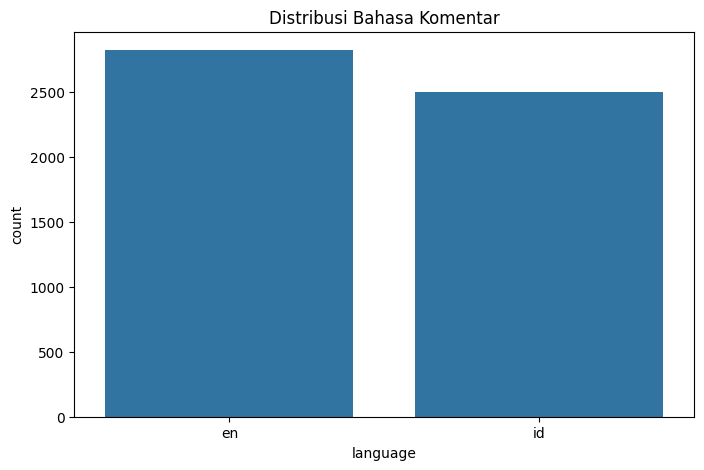

In [209]:
# Distribusi bahasa
plt.figure(figsize=(8,5))
sns.countplot(data=clean_df, x='language')
plt.title('Distribusi Bahasa Komentar')
plt.show()

Insight:
- Distribusi data sangat baik, dengan data lebih banyak condong ke sebelah kiri
- Jumlah penonton yang comment paling banyak berbahasa inggris dan kemungkinan sebagian penonton adalah orang luar Indonesia

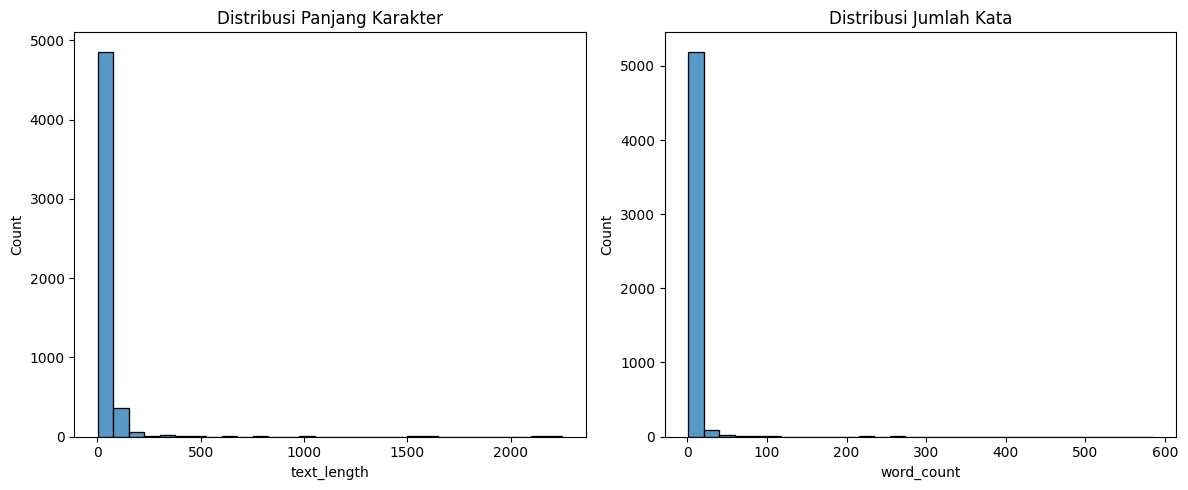

In [210]:
# Analisis panjang teks
clean_df['text_length'] = clean_df['final_text'].apply(len)
clean_df['word_count'] = clean_df['final_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=clean_df, x='text_length', bins=30)
plt.title('Distribusi Panjang Karakter')

plt.subplot(1,2,2)
sns.histplot(data=clean_df, x='word_count', bins=30)
plt.title('Distribusi Jumlah Kata')
plt.tight_layout()
plt.show()


Insight:
- Jumlah panjang karakter kata rata-rata paing banyak berada pada jumlah 0-250 dan paling banyak berada setelah angka 0-100
- terdapat juga beberapa comment yang memiliki jumalh karakter lebih dari 2000
- Distribusi data lebih condong ke sebelah kiri dengan rentang kata sekitar 0-30 an kata.
- Terdapat juga beberapa comment yang memiliki jumlah kata lebih dari 200 - 300

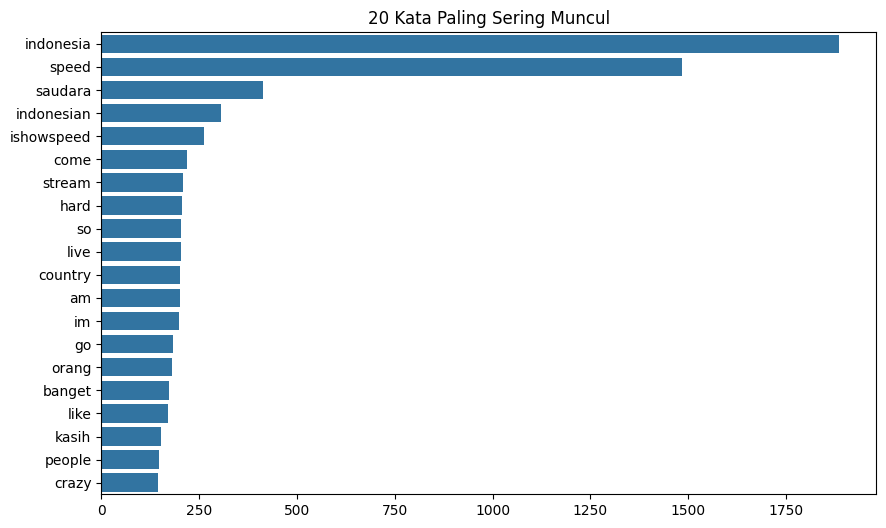

In [211]:
# Top kata paling sering muncul
from collections import Counter

all_words = ' '.join(clean_df['final_text']).split()
word_freq = Counter(all_words).most_common(20)

plt.figure(figsize=(10,6))
sns.barplot(x=[count for word, count in word_freq], 
            y=[word for word, count in word_freq])
plt.title('20 Kata Paling Sering Muncul')
plt.show()

Insight:
- Kata Indonesia menjadi kata yang paling sering muncul pada data teks tersebut dan disusul oleh kata speed
- Jumlah kata paling banyak yaitu Indonesia memiliki jumlah kemuncuclan sebanyak 1750 kata

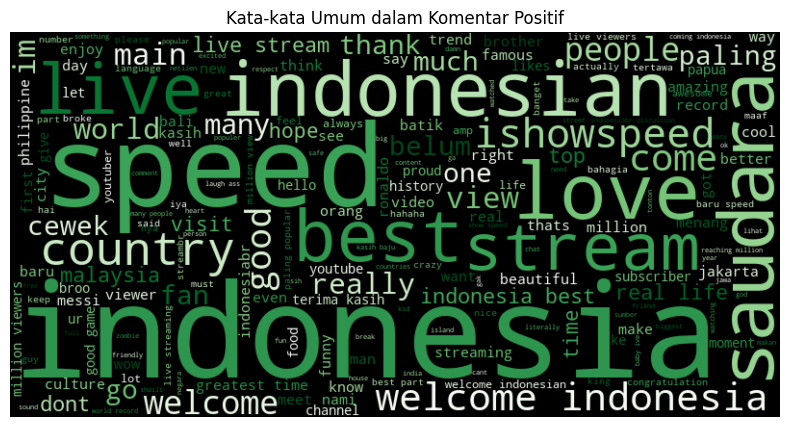

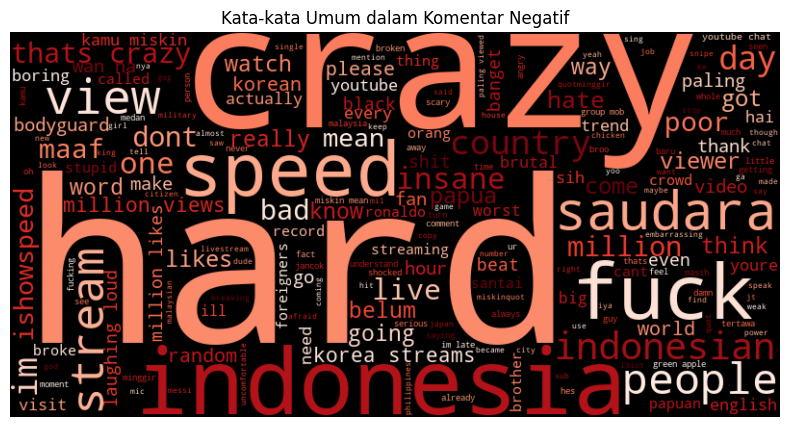

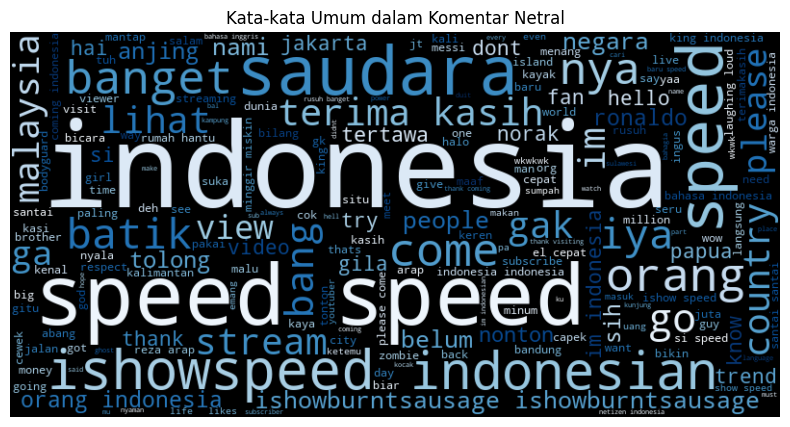


10 Kata Paling Umum dalam Komentar Positif:
[('indonesia', 552), ('speed', 345), ('live', 158), ('best', 140), ('welcome', 131), ('indonesian', 120), ('love', 119), ('saudara', 115), ('stream', 107), ('country', 88)]

10 Kata Paling Umum dalam Komentar Negatif:
[('hard', 199), ('so', 197), ('am', 195), ('crazy', 122), ('indonesia', 86), ('fuck', 59), ('speed', 47), ('saudara', 47), ('views', 42), ('people', 31)]

10 Kata Paling Umum dalam Komentar Netral:
[('indonesia', 1248), ('speed', 1092), ('saudara', 252), ('ishowspeed', 165), ('indonesian', 160), ('orang', 159), ('banget', 154), ('come', 141), ('go', 140), ('nya', 130)]


In [212]:
from wordcloud import WordCloud
from collections import Counter

# Fungsi untuk membuat word cloud
colors = ['Greens', 'Reds', 'Blues',]

# Fungsi untuk membuat word cloud
def generate_wordcloud(text, title, colormap='Greens'):
    wordcloud = WordCloud(width=800, height=400, colormap=colormap, background_color='black').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Pisahkan teks berdasarkan sentimen
positive_text = ' '.join(clean_df[clean_df['sentiment'] == 'positive']['final_text'])
negative_text = ' '.join(clean_df[clean_df['sentiment'] == 'negative']['final_text'])
neutral_text = ' '.join(clean_df[clean_df['sentiment'] == 'neutral']['final_text'])

# Generate word cloud untuk masing-masing sentimen
generate_wordcloud(positive_text, "Kata-kata Umum dalam Komentar Positif", colormap='Greens')
generate_wordcloud(negative_text, "Kata-kata Umum dalam Komentar Negatif", colormap='Reds')
generate_wordcloud(neutral_text, "Kata-kata Umum dalam Komentar Netral", colormap='Blues')

# Analisis kata paling umum untuk masing-masing sentimen
def get_top_words(text, n=10):
    words = text.split()
    return Counter(words).most_common(n)

print("\n10 Kata Paling Umum dalam Komentar Positif:")
print(get_top_words(positive_text))
print("\n10 Kata Paling Umum dalam Komentar Negatif:")
print(get_top_words(negative_text))
print("\n10 Kata Paling Umum dalam Komentar Netral:")
print(get_top_words(neutral_text))

Insight:

Word cloud dan analisis kata kunci mengungkapkan bahwa komentar positif sering mengandung kata-kata seperti 'indonesia', 'speed', 'live', dan 'best', menunjukkan antusiasme dan dukungan terhadap konten iShowSpeed. Komentar negatif mungkin mengandung kata-kata seperti 'hard', 'crazy', 'fuck', atau 'views', yang mengindikasikan kritik terhadap interaksi atau perilaku. Komentar netral cenderung berisi referensi umum seperti 'indonesia', 'speed', 'saudara', dan 'ishowspeed', yang menunjukkan ketertarikan umum dan diskusi tentang konten tanpa emosi yang kuat.

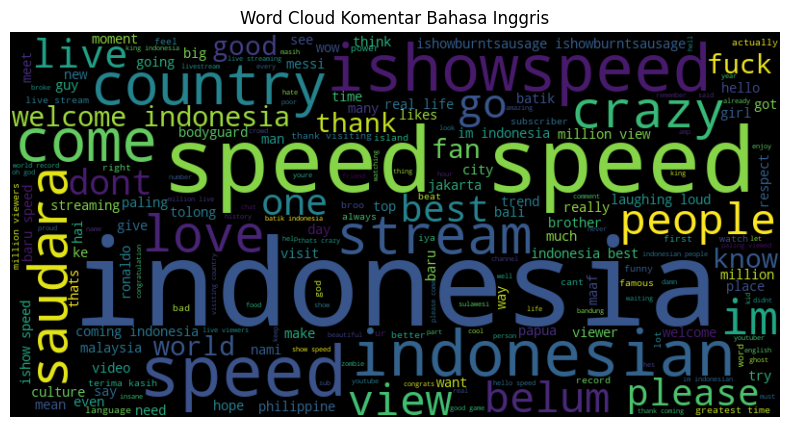

In [230]:
# Wordcloud untuk bahasa Inggris
en_text = ' '.join(clean_df[clean_df['language']=='en']['final_text'])
wordcloud = WordCloud(width=800, height=400).generate(en_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Komentar Bahasa Inggris')
plt.show()

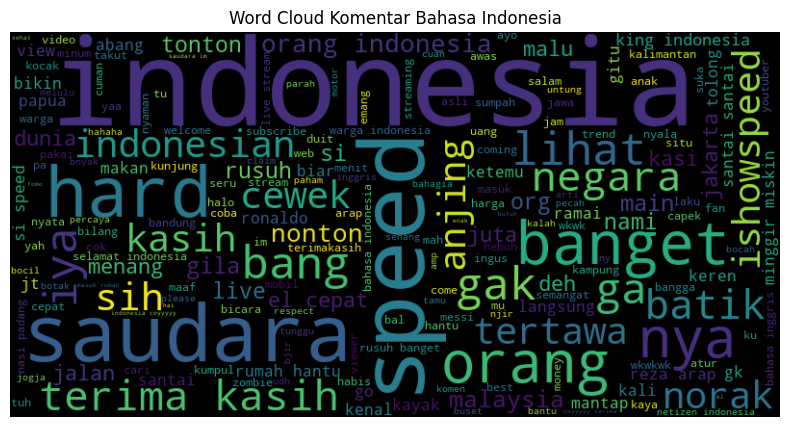

In [214]:
# Wordcloud untuk bahasa Indonesia
id_text = ' '.join(clean_df[clean_df['language']=='id']['final_text'])
wordcloud = WordCloud(width=800, height=400).generate(id_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Komentar Bahasa Indonesia')
plt.show()

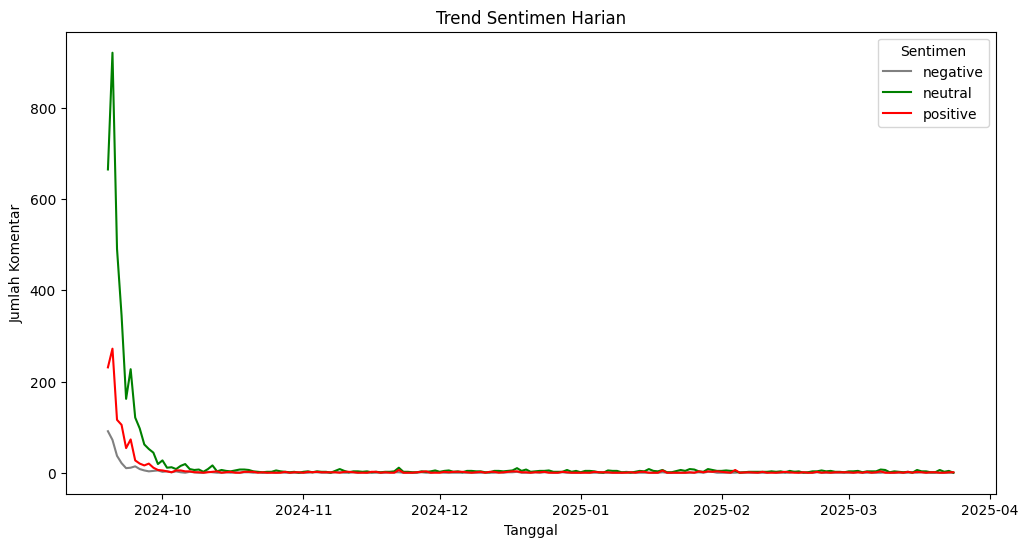

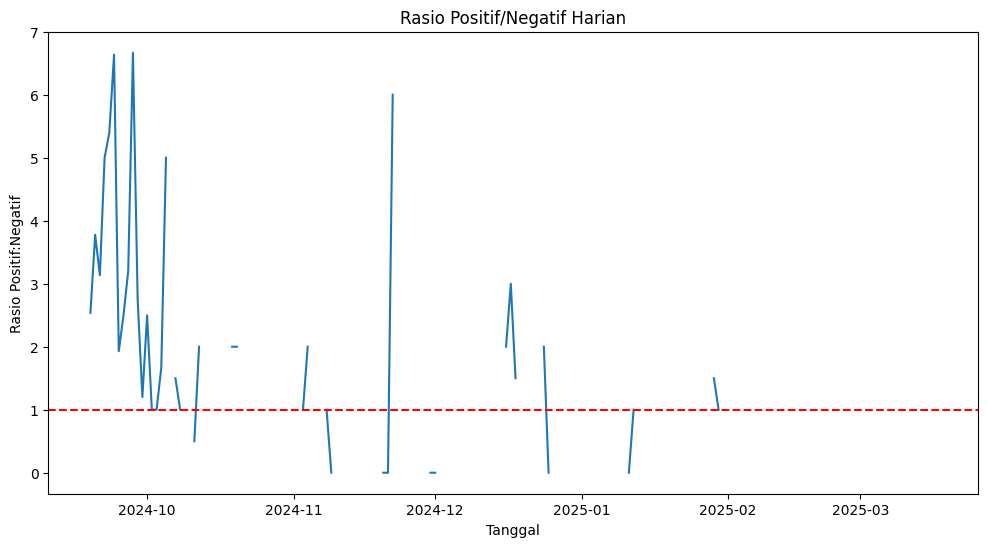

In [231]:
# Konversi kolom waktu
clean_df['published_at'] = pd.to_datetime(clean_df['published_at'])
clean_df['date'] = clean_df['published_at'].dt.date

# Analisis sentimen per hari
sentiment_by_day = clean_df.groupby(['date', 'sentiment']).size().unstack().fillna(0)
sentiment_by_day.plot(kind='line', figsize=(12,6), color=['gray', 'green', 'red'])
plt.title('Trend Sentimen Harian')
plt.ylabel('Jumlah Komentar')
plt.xlabel('Tanggal')
plt.legend(title='Sentimen')
plt.show()

# Hitung rasio positif/negatif per hari
sentiment_by_day['pos_neg_ratio'] = sentiment_by_day['positive'] / sentiment_by_day['negative']
sentiment_by_day['pos_neg_ratio'].plot(figsize=(12,6))
plt.title('Rasio Positif/Negatif Harian')
plt.ylabel('Rasio Positif:Negatif')
plt.xlabel('Tanggal')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

Insight:

Grafik menunjukkan jumlah komentar harian berdasarkan sentimen (positif, netral, dan negatif) dari September 2024 sampai Maret 2025. Terlihat bahwa di awal September 2024, jumlah komentar negatif sangat tinggi, bahkan lebih dari 800 komentar dalam satu hari. Komentar positif dan netral juga ikut naik, tapi tidak sebanyak komentar negatif.

Setelah itu, semua jenis komentar mulai menurun drastis dan menjadi stabil di angka yang rendah hingga Maret 2025. Ini menunjukkan bahwa banyak orang memberikan komentar, terutama yang bernada negatif, hanya pada awal periode saja. Kemungkinan hal ini dipicu oleh konten atau kejadian tertentu yang ramai dibicarakan saat itu.

Secara keseluruhan, komentar negatif paling mendominasi di awal, tapi seiring waktu, jumlah komentar dari semua jenis sentimen jadi hampir sama dan tidak terlalu banyak.


In [216]:
from sklearn.decomposition import LatentDirichletAllocation

# Fungsi untuk analisis topik
def analyze_topics(texts, n_topics=3, n_top_words=5):
    tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=list(stop_words_en.union(stop_words_id)))
    dtm = tfidf.fit_transform(texts)
    
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(dtm)
    
    # Ambil kata-kata penting untuk setiap topik
    feature_names = tfidf.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(lda.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(f"Topik {topic_idx+1}: " + ", ".join(top_features))
    
    return topics

# Analisis topik untuk masing-masing sentimen
print("\nTopik dalam Komentar Positif:")
print(analyze_topics(clean_df[clean_df['sentiment'] == 'positive']['final_text']))

print("\nTopik dalam Komentar Negatif:")
print(analyze_topics(clean_df[clean_df['sentiment'] == 'negative']['final_text']))

print("\nTopik dalam Komentar Netral:")
print(analyze_topics(clean_df[clean_df['sentiment'] == 'neutral']['final_text']))


Topik dalam Komentar Positif:
['Topik 1: real, speed, first, come, funny', 'Topik 2: live, stream, speed, indonesia, many', 'Topik 3: indonesia, welcome, best, love, speed']

Topik dalam Komentar Negatif:
['Topik 1: im, indonesian, people, ishowspeed, poor', 'Topik 2: saudara, speed, indonesia, insane, hate', 'Topik 3: crazy, fuck, views, million, indonesia']

Topik dalam Komentar Netral:
['Topik 1: speed, saudara, indonesia, come, go', 'Topik 2: indonesia, ishowspeed, im, kasih, king', 'Topik 3: banget, nya, santai, tertawa, gak']


Insight:

Analisis topik menunjukkan bahwa komentar positif sering membahas tentang kemenangan, streaming langsung, dan apresiasi terhadap konten serta kebanggaan nasional. Komentar negatif cenderung berfokus pada kritik terhadap perilaku yang dianggap gila atau tidak pantas, serta ekspresi kebencian. Sementara itu, komentar netral biasanya berisi referensi umum tentang Indonesia, iShowSpeed, dan interaksi yang lebih deskriptif daripada emosional. Hasil ini memberikan wawasan yang lebih baik tentang sentimen dan topik yang sering dibahas dalam komentar, membantu kita memahami bagaimana audiens merespons konten yang diberikan.

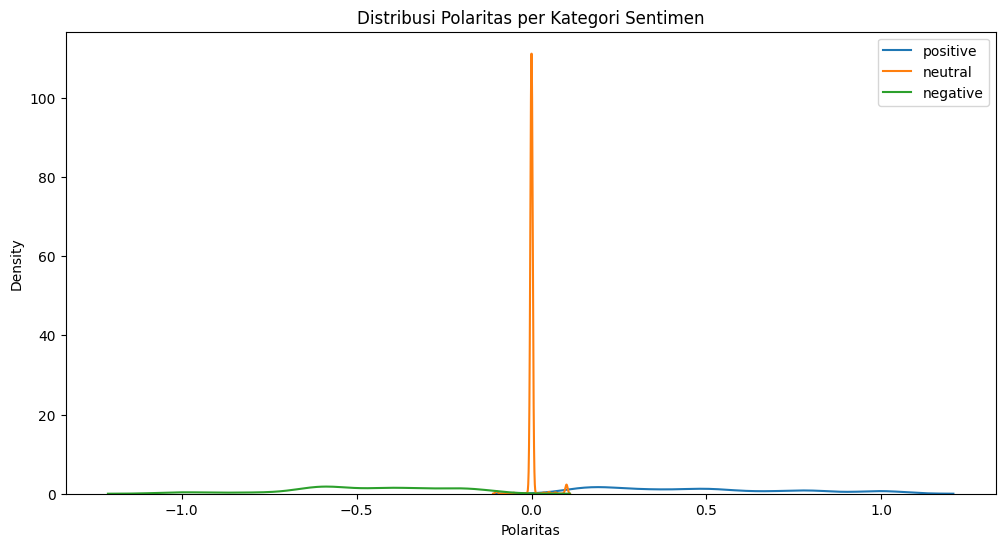


Rata-rata Polaritas dan Subjektivitas per Sentimen:
           polarity  subjectivity
sentiment                        
negative  -0.466793      0.721929
neutral    0.001759      0.033807
positive   0.478949      0.586952


In [217]:
# Analisis polarity dan subjectivity untuk tiap sentimen
clean_df['polarity'] = clean_df['final_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
clean_df['subjectivity'] = clean_df['final_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Plot distribusi polarity
plt.figure(figsize=(12,6))
for sentiment in ['positive', 'neutral', 'negative']:
    sns.kdeplot(clean_df[clean_df['sentiment'] == sentiment]['polarity'], label=sentiment)
plt.title('Distribusi Polaritas per Kategori Sentimen')
plt.xlabel('Polaritas')
plt.ylabel('Density')
plt.legend()
plt.show()

# Analisis rata-rata polarity dan subjectivity per sentimen
print("\nRata-rata Polaritas dan Subjektivitas per Sentimen:")
print(clean_df.groupby('sentiment')[['polarity', 'subjectivity']].mean())

Insight:

Analisis emosi dengan TextBlob menunjukkan bahwa komentar positif memiliki polaritas rata-rata 0.478, sedangkan komentar negatif memiliki polaritas -0.465. Ini berarti komentar positif cenderung sangat mendukung, sementara komentar negatif menunjukkan ketidakpuasan yang jelas. Komentar netral memiliki polaritas mendekati 0, menandakan keseimbangan tanpa kecenderungan tertentu.

Dari segi subjektivitas, komentar negatif (0.719) dan positif (0.586) lebih banyak berisi opini, sedangkan komentar netral (0.034) lebih objektif. Grafik menunjukkan bahwa komentar netral paling terkonsentrasi di polaritas 0, sementara komentar positif dan negatif lebih menyebar ke arah masing-masing.

Hasil ini mengindikasikan bahwa komentar emosional cenderung berisi opini pribadi, sedangkan komentar netral lebih bersifat faktual.

In [218]:
# Menyimpan dataset label yang telah di ekstraksi fitur
tfidf_df = pd.DataFrame(
    tfidf_features.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)
tfidf_df['sentiment'] = clean_df['sentiment']

# Simpan ke CSV
tfidf_df.to_csv('dataset_labeled.csv', index=False)

print("- dataset_labeled.csv")

- dataset_labeled.csv


# PEMBUATAN MODEL

In [219]:
# Import library 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

- Percobaan sentiment pada project ini menggunakan 3 algoritma yaitu Logistic Regression, Random Forest Classifier, dan Multi layer Percepton Classifier

In [220]:
df = pd.read_csv('dataset_labeled.csv')
df.head()

,aamiin,abang,abangkuh,able,absolutely,aceh,achieving,achieving million,achieving subscribers,actions,...,youtubers,youu,youve,yt,yu,zombie,zombie indonesia,zombies,zombies indonesia,sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neutral


In [221]:
# 1. Load Dataset Berlabel
X = df.drop('sentiment', axis=1)  # Fitur TF-IDF
y = df['sentiment']  # Label

print(X.shape, '\n', X.head(), '\n')
print('\n', y.shape, '\n', y.head())

(5324, 5000) 
    aamiin  abang  abangkuh  able  absolutely  aceh  achieving  \
0     0.0    0.0       0.0   0.0         0.0   0.0        0.0   
1     0.0    0.0       0.0   0.0         0.0   0.0        0.0   
2     0.0    0.0       0.0   0.0         0.0   0.0        0.0   
3     0.0    0.0       0.0   0.0         0.0   0.0        0.0   
4     0.0    0.0       0.0   0.0         0.0   0.0        0.0   

   achieving million  achieving subscribers  actions  ...  youtuber speed  \
0                0.0                    0.0      0.0  ...             0.0   
1                0.0                    0.0      0.0  ...             0.0   
2                0.0                    0.0      0.0  ...             0.0   
3                0.0                    0.0      0.0  ...             0.0   
4                0.0                    0.0      0.0  ...             0.0   

   youtubers  youu  youve   yt   yu  zombie  zombie indonesia  zombies  \
0        0.0   0.0    0.0  0.0  0.0     0.0              

In [222]:
# Encode Label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(y_encoded)

[2 1 2 ... 1 1 1]


## Skema 1: Logistic Regression + TF-IDF + 80/20

In [ ]:
# Percobaan 1: Logistic Regression dengan TF-IDF (80/20)
print("Percobaan 1: Logistic Regression dengan TF-IDF (80/20)")
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

logreg_model = LogisticRegression(max_iter=200, random_state=42, C=10, solver='lbfgs')
logreg_model.fit(X_train_lr, y_train_lr)
y_pred_logreg = logreg_model.predict(X_test_lr)

acc_logreg = accuracy_score(y_test_lr, y_pred_logreg)
print("Logistic Regression Accuracy:", acc_logreg)
print(classification_report(y_test_lr, y_pred_logreg))

Percobaan 1: Logistic Regression dengan TF-IDF (80/20)
Logistic Regression Accuracy: 0.9070422535211268
              precision    recall  f1-score   support

           0       0.92      0.56      0.70        64
           1       0.90      0.99      0.94       764
           2       0.94      0.74      0.83       237

    accuracy                           0.91      1065
   macro avg       0.92      0.76      0.82      1065
weighted avg       0.91      0.91      0.90      1065



## Skema 2: Random Forest + TF-IDF + 80/20

In [224]:
# Percobaan 2: Random Forest dengan TF-IDF (80/20)
print("\nPercobaan 2: Random Forest dengan TF-IDF (80/20)")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_lr, y_train_lr)  # pakai data yang sama dengan Logistic Regression
y_pred_rf = rf_model.predict(X_test_lr)

acc_rf = accuracy_score(y_test_lr, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)
print(classification_report(y_test_lr, y_pred_rf))


Percobaan 2: Random Forest dengan TF-IDF (80/20)
Random Forest Accuracy: 0.9248826291079812
              precision    recall  f1-score   support

           0       0.90      0.59      0.72        64
           1       0.92      0.98      0.95       764
           2       0.93      0.82      0.87       237

    accuracy                           0.92      1065
   macro avg       0.92      0.80      0.85      1065
weighted avg       0.92      0.92      0.92      1065



## Skema 3: MLPClassifier + TF-IDF + 70/30

In [225]:
# --- Percobaan 3: MLPClassifier (70/30) ---
print("\nPercobaan 3: MLPClassifier dengan TF-IDF (70/30)")
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    alpha=0.0005,
    learning_rate='adaptive',
    max_iter=300,
    random_state=42
)
mlp_model.fit(X_train_mlp, y_train_mlp)
y_pred_mlp = mlp_model.predict(X_test_mlp)

acc_mlp = accuracy_score(y_test_mlp, y_pred_mlp)
print("MLPClassifier Accuracy:", acc_mlp)
print(classification_report(y_test_mlp, y_pred_mlp))


Percobaan 3: MLPClassifier dengan TF-IDF (70/30)
MLPClassifier Accuracy: 0.8923654568210263
              precision    recall  f1-score   support

           0       0.75      0.63      0.68       100
           1       0.91      0.95      0.93      1147
           2       0.86      0.77      0.81       351

    accuracy                           0.89      1598
   macro avg       0.84      0.78      0.81      1598
weighted avg       0.89      0.89      0.89      1598



In [226]:
# --- Simpan dan Bandingkan Hasil Akurasi ---
results = {
    "Logistic Regression": acc_logreg,
    "Random Forest": acc_rf,
    "MLPClassifier": acc_mlp
}

print("\nHasil Akurasi dari Ketiga Algoritma:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")

# --- Ambil Model Terbaik ---
# --- Ambil Model Terbaik ---
best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]

if best_model_name == "Logistic Regression":
    best_model = logreg_model
elif best_model_name == "Random Forest":
    best_model = rf_model
else:
    best_model = mlp_model

print(f"\nAlgoritma dengan akurasi terbaik adalah: '{best_model_name}' dengan akurasi: {best_accuracy:.4f}")


Hasil Akurasi dari Ketiga Algoritma:
Logistic Regression: 0.9070
Random Forest: 0.9249
MLPClassifier: 0.8924

Algoritma dengan akurasi terbaik adalah: 'Random Forest' dengan akurasi: 0.9249


Insight:
- Dari hasil percobaan tersebut, diperoleh algoritma terbaik yaitu Random Forest dengan akurasi 92%

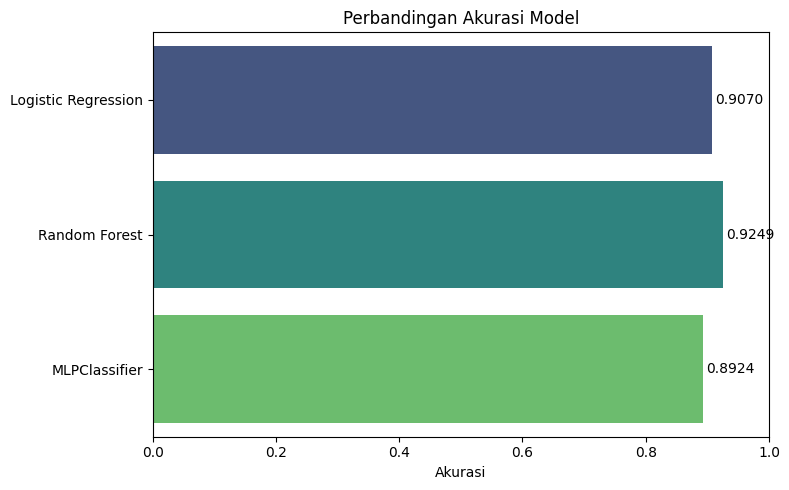

In [227]:
# --- Data akurasi dari hasil model ---
model_names = list(results.keys())
accuracies = list(results.values())

# --- Plot bar chart ---
plt.figure(figsize=(8, 5))
sns.barplot(x=accuracies, y=model_names, palette='viridis')

plt.xlabel('Akurasi')
plt.title('Perbandingan Akurasi Model')
for i, acc in enumerate(accuracies):
    plt.text(acc + 0.005, i, f"{acc:.4f}", va='center')

plt.xlim(0, 1)
plt.tight_layout()
plt.show()

## Menyimpan Model Terbaik

In [228]:
import joblib

model_data = {
    'model': best_model,  # Model terbaik (Random Forest)
    'vectorizer': tfidf_vectorizer,  # TF-IDF Vectorizer
    'label_encoder': label_encoder,  # Label Encoder
    'preprocessing_functions': {  # Fungsi preprocessing untuk konsistensi
        'cleaningComment': cleaningComment,
        'comment_en': comment_en,
        'comment_id': comment_id,
        'detect_language': detect_language
    }
}

# 2. Simpan ke file
joblib.dump(model_data, 'best_sentiment_model.pkl')
print("Model terbaik dan komponen pendukung telah disimpan!")

Model terbaik dan komponen pendukung telah disimpan!


# Inference atau Testing Model Terbaik

In [229]:
# ====== FUNGSI INFERENSI ======
def predict_sentiment(text, model_path='best_sentiment_model.pkl'):

    #Memprediksi sentimen dari teks komentar baru
    # Load model dan komponen
    model_data = joblib.load(model_path)
    model = model_data['model']
    vectorizer = model_data['vectorizer']
    label_encoder = model_data['label_encoder']
    
    # Ambil fungsi preprocessing
    cleaning_func = model_data['preprocessing_functions']['cleaningComment']
    detect_lang_func = model_data['preprocessing_functions']['detect_language']
    comment_en_func = model_data['preprocessing_functions']['comment_en']
    comment_id_func = model_data['preprocessing_functions']['comment_id']
    
    # Preprocessing teks baru (sama seperti saat training)
    cleaned_text = cleaning_func(text)
    
    # Deteksi bahasa dan proses sesuai bahasa
    lang = detect_lang_func(cleaned_text)
    if lang == 'en':
        processed_text = comment_en_func(cleaned_text)
    elif lang == 'id':
        processed_text = comment_id_func(cleaned_text)
    else:
        processed_text = ''
    
    if not processed_text.strip():
        return "neutral (komentar tidak valid setelah preprocessing)"
    
    # Transformasi ke TF-IDF
    text_vector = vectorizer.transform([processed_text])
    
    # Prediksi
    prediction = model.predict(text_vector)
    
    # Kembalikan label asli
    return label_encoder.inverse_transform(prediction)[0]

# ====== CONTOH INFERENSI ======
test_comments = [
    "Gila speed lucu banget, ngakak asli 😂",
    "Dasar tidak sopan, teriak-teriak di masjid!",
    "Welcome to Indonesia Speed! We love you ❤️",
    "Aku suka banget live nya seru banget",
    "Ga jelas banget sih kontennya, bikin kesel",
    "Speed is the best! Always entertaining",
    "Gak worth it nontonnya, buang waktu aja"
]

print("\nHasil Prediksi Sentimen:")
for comment in test_comments:
    sentiment = predict_sentiment(comment)
    print(f"Komentar: {comment[:50]}... → Sentimen: {sentiment}")


Hasil Prediksi Sentimen:
Komentar: Gila speed lucu banget, ngakak asli 😂... → Sentimen: neutral
Komentar: Dasar tidak sopan, teriak-teriak di masjid!... → Sentimen: neutral
Komentar: Welcome to Indonesia Speed! We love you ❤️... → Sentimen: positive
Komentar: Aku suka banget live nya seru banget... → Sentimen: positive
Komentar: Ga jelas banget sih kontennya, bikin kesel... → Sentimen: neutral
Komentar: Speed is the best! Always entertaining... → Sentimen: positive
Komentar: Gak worth it nontonnya, buang waktu aja... → Sentimen: neutral
